# **TALLER 2 – REDES NEURONALES DE BASE RADIAL (RBFNN O RBNN)**

**Nombre:** *Dayan Cristina Tabares Gómez*

**Código:** *201910125*

1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN. Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)

**Link del conjunto de datos:**

http://medata.gov.co/dataset/dengue

http://medata.gov.co/dataset/dengue/resource/b1e786cf-1e47-4b1c-b8d0-5c2f14cd354c#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}}}

Descripción de las variables que componenen el set de datos:

*   Id : Numero consecutivo
*   Semana: semanas del año de 1 a 53
*   Edad: Edad
*   Unidad de Medida: 0= No aplica, 1=Años, 2=Meses, 3=Días, 4=Horas, 5=Minutos SD=Sin informacion
*   Sexo: M=Masculino, F=Femenino, SD=Sin informacion
*   Nombre Barrio: Texto asociado a la tabla de barrios definidos por la entidad territorial, Vacios se diligencian con "Sin Informacion", Sin ubicación en zona urbana.
*   Comuna: Texto asociado a la tabla de barrios definidos por la entidad territorial, Vacios se diligencian con "Sin Informacion", Sin ubicación en zona urbana.
*   Tipo de Regimen de Seguridad Social: Tipo de Régimen de seguridad social: C= Contributivo, S=Subsidiado, P=Excepción, E=Especial, N= No asegurado, I= Indeterminado/Pendiente, SD=Sin informacion.
*   Codigo de la aseguradora: Codigo de la aseguradora
*   Fecha de la Consulta: Fecha de Consulta
*   Fecha de inicio de sintomas: Fecha de inicio de síntomas
*   Tipo de caso: Tipo de caso: 1=Sospechoso, 2= Probable , 3=Confirmado por laboratorio , 4=Confirmado por clinica , 5= Confirmado por nexo epidemiológico.
*   Paciente Hospitalizado: Paciente hospitalizado 1= Si, 2=No.
*   Código departamento residencia: Código departamento residencia
*   Código municipio residencia: Código munciipio residencia
*   Código departamento ocurrencia: Código departamento ocurrencia
*   Código municipio ocurrencia: Código municipio ocurrencia
*   Desplazamiento: 1= Si, 2=No. SD= Sin Informacion
*   Código municipio desplazamiento: Código municipio desplazamiento
*   Clase Dengue: 0= No aplica, 1=Dengue sin signos de alarma, 2=Dengue con signos de alarma 3=Dengue grave, SD=Sin Informacion
*   fiebre, cefalea, dolrretrro, malgias, artralgia, erupcionr, dolor_abdo, vomito, somnolenci, hipotensio, hepatomeg, hem_mucosa, hipotermia, um_hemato, caida_palq, acum_liquievento: 1= Si, 2=No.SD=Sin Informacion
*   Evento: Descripción del evento notificado
*   Year_: Año de notificación

2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes.

In [1]:
import pandas  as pd

#conexion con drive
from google.colab import drive
drive.mount ('/content/drive')

# cargar dataframe
datos_enferm_epid = pd.read_csv('/content/drive/MyDrive/Aprendizaje automatico/sivigila_dengue.csv', sep=';')

# leer dataframa
datos_enferm_epid.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-0facd62223a0>:8: DtypeWarning: Columns (3,11,12,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_enferm_epid = pd.read_csv('/content/drive/MyDrive/Aprendizaje automatico/sivigila_dengue.csv', sep=';')


,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,1,24,49,1,M,Belen,Belen,C,EAS022,2010-06-19,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,2,24,47,1,M,Belen,Belen,C,CCF002,2010-06-18,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,3,24,46,1,M,Sucre,Villa Hermosa,C,EPS010,2010-06-21,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
3,4,24,45,1,M,SIN INFORMACION,SIN INFORMACION,C,EPS010,2010-06-15,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,5,24,46,1,M,Perpetuo Socorro,La Candelaria,C,EPS010,2010-06-20,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
5,6,24,45,1,M,Terminal de Transporte,Castilla,C,EPS006,2010-06-17,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
6,7,24,44,1,M,Patio Bonito,El Poblado,C,EPS010,2010-06-20,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
7,8,24,44,1,M,Doce de Octubre No.2,Doce de Octubre,C,CCF002,2010-06-14,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
8,9,24,44,1,M,Belalcazar,Castilla,C,EPS003,2010-06-20,...,SD,2,2,SD,SD,SD,SD,SD,DENGUE,2010
9,10,24,44,1,M,San Antonio de Prado,San Antonio de Prado,C,EPS016,2010-06-20,...,SD,2,2,SD,SD,SD,SD,SD,DENGUE,2010


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['fec_con_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['ini_sin_'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['id', 'edad_']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_9, *['comuna', 'cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_10, *['cod_ase_', 'fec_con_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['fec_con_', 'ini_sin_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_12, *['ini_sin_', 'tip_cas_'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['id', 'comuna'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['id', 'cod_ase_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['id', 'fec_con_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['id', 'ini_sin_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['id', 'edad_', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['id', 'edad_', 'cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['id', 'edad_', 'fec_con_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_20, *['id', 'edad_', 'ini_sin_'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [2]:
# Analisis de las variables de los datos
datos_enferm_epid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                53813 non-null  int64 
 1   semana            53813 non-null  int64 
 2   edad_             53813 non-null  int64 
 3   uni_med_          53813 non-null  object
 4   sexo_             53813 non-null  object
 5   nombre_barrio     53813 non-null  object
 6   comuna            53813 non-null  object
 7   tipo_ss_          53813 non-null  object
 8   cod_ase_          53813 non-null  object
 9   fec_con_          53813 non-null  object
 10  ini_sin_          53813 non-null  object
 11  tip_cas_          53813 non-null  object
 12  pac_hos_          53813 non-null  object
 13  cod_dpto_r        53813 non-null  int64 
 14  cod_mpio_r        53813 non-null  int64 
 15  cod_dpto_o        53813 non-null  object
 16  cod_mpio_o        53813 non-null  object
 17  desplazami  

In [3]:
# Variable dependiente

datos_enferm_epid['clas_dengue'].unique()

array(['SD', '1', '2', '3', 1, 2, '5'], dtype=object)

In [4]:
#datos_enferm_epid['evento'].value_counts()

In [5]:
# Variables independientes

variables_independientes = datos_enferm_epid.columns.tolist()

print("Variables Independientes:")
print(variables_independientes)

Variables Independientes:
['id', 'semana', 'edad_', 'uni_med_', 'sexo_', 'nombre_barrio', 'comuna', 'tipo_ss_', 'cod_ase_', 'fec_con_', 'ini_sin_', 'tip_cas_', 'pac_hos_', 'cod_dpto_r', 'cod_mpio_r', 'cod_dpto_o', 'cod_mpio_o', 'desplazami', 'cod_mun_d', 'clas_dengue', 'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito', 'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia', 'aum_hemato', 'caida_plaq', 'acum_liquievento', 'evento', 'year_']


De acuerdo a los datos entregados en el dataframe, la variable dependiente es **'clas_dengue'** dado que se busca clasificar los datos ingresados en si tienen sintomas de un dengue, y estos sintomas:

*   fiebre            
*   cefalea
*   dolrretroo
*   malgias
*   artralgia
*   erupcionr
*   dolor_abdo
*   vomito
*   somnolenci
*   hipotensio
*   hepatomeg
*   hem_mucosa
*   hipotermia
*   aum_hemato
*   caida_plaq
*   acum_liquievento















3. Realice el proceso de limpieza de los datos, justificando cada una de las etapas utilizadas.  

Y

4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para
realizar el tratamiento de esos datos y justifique cada uno de los procedimientos utilizados.

In [6]:
datos_enferm_epid.head()

,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,1,24,49,1,M,Belen,Belen,C,EAS022,2010-06-19,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,2,24,47,1,M,Belen,Belen,C,CCF002,2010-06-18,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,3,24,46,1,M,Sucre,Villa Hermosa,C,EPS010,2010-06-21,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
3,4,24,45,1,M,SIN INFORMACION,SIN INFORMACION,C,EPS010,2010-06-15,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,5,24,46,1,M,Perpetuo Socorro,La Candelaria,C,EPS010,2010-06-20,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_21, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_22, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_23, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_24, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_25, *['nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_26, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_27, *['cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_28, *['fec_con_'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_29, *[[['id', 'edad_']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_30, *['nombre_barrio', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_31, *['comuna', 'cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_32, *['cod_ase_', 'fec_con_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_33, *['fec_con_', 'ini_sin_'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_34, *['id', 'nombre_barrio'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_35, *['id', 'comuna'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_36, *['id', 'cod_ase_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_37, *['id', 'fec_con_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_38, *['id', 'edad_', 'nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_39, *['id', 'edad_', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_40, *['id', 'edad_', 'cod_ase_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_41, *['id', 'edad_', 'fec_con_'], **{})
chart

**Como primer paso, se realiza un análisis de todo el dataframe para determinar los datos que deben de sufrir alguna transformación**

**Se evaluan si el dataset tiene valores nulos, pero no se encuentran datos vacios por lo cual no se genera remmplazo de estos**



In [7]:
# Evaluar valores faltantes en cada columna

valores_nulos = datos_enferm_epid.isnull().sum()

print("valores nullos por columna")
print(valores_nulos)

valores nullos por columna
id                  0
semana              0
edad_               0
uni_med_            0
sexo_               0
nombre_barrio       0
comuna              0
tipo_ss_            0
cod_ase_            0
fec_con_            0
ini_sin_            0
tip_cas_            0
pac_hos_            0
cod_dpto_r          0
cod_mpio_r          0
cod_dpto_o          0
cod_mpio_o          0
desplazami          0
cod_mun_d           0
clas_dengue         0
fiebre              0
cefalea             0
dolrretroo          0
malgias             0
artralgia           0
erupcionr           0
dolor_abdo          0
vomito              0
somnolenci          0
hipotensio          0
hepatomeg           0
hem_mucosa          0
hipotermia          0
aum_hemato          0
caida_plaq          0
acum_liquievento    0
evento              0
year_               0
dtype: int64


**De acuerdo al análisis realizado al set de datos se cuentan con varias columnas que no tienen información relevante para la clasificación de los datos por lo cual se genera una copia al dataset y se eliminan estas columnas.**

In [8]:
#Eliminación de columnas

# Se elimina la columna id que no trae información relevante a los datos adicionalmente

columnas_a_eliminar = ['uni_med_', 'tipo_ss_', 'cod_ase_','fec_con_','cod_dpto_r','cod_mpio_r','cod_dpto_o','cod_mpio_o','cod_mun_d','ini_sin_','id']

In [9]:
# Hacer copia del datafram
data_copia = datos_enferm_epid.copy()

In [10]:
# eliminar las columnas especificadas
data_copia = data_copia.drop(columns = columnas_a_eliminar)

In [11]:
data_copia.head()

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,M,Belen,Belen,2,1,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,24,47,M,Belen,Belen,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,24,46,M,Sucre,Villa Hermosa,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
3,24,45,M,SIN INFORMACION,SIN INFORMACION,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,24,46,M,Perpetuo Socorro,La Candelaria,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_42, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_43, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_44, *['nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_45, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_46, *['pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_47, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_48, *['nombre_barrio', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_49, *['comuna', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_50, *['pac_hos_', 'cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_51, *['cefalea', 'artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_52, *['edad_', 'nombre_barrio'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_53, *['edad_', 'comuna'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_54, *['edad_', 'pac_hos_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_55, *['edad_', 'cefalea'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_56, *['semana', 'edad_', 'nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_57, *['semana', 'edad_', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_58, *['semana', 'edad_', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_59, *['semana', 'edad_', 'cefalea'], **{})
chart

**Una vez se hayan eliminado las anteriores columnas se genera la validación de las restantes y se encuentra que la columna nombre_barrio existen 3287 datos catalogada sin información por lo cual se procede a eliminar los datos.**

In [12]:
# validar datos que esten vacios o sin información

data_copia['nombre_barrio'].value_counts()

SIN INFORMACION            3287
San Antonio de Prado       1175
Las Granjas                 652
Villatina                   643
San Bernardo                590
                           ... 
Suburbano Urquita             1
Suburbano Pedregal alto       1
Suburbano El Placer           1
Suburbano el Tesoro           1
Asomadera N.2                 1
Name: nombre_barrio, Length: 441, dtype: int64

In [13]:
# Borrado de los datos que sean igual a 'SIN INFORMACION'
data_copia = data_copia[data_copia['nombre_barrio'] != 'SIN INFORMACION']

In [14]:
data_copia['nombre_barrio'].value_counts()

San Antonio de Prado           1175
Las Granjas                     652
Villatina                       643
San Bernardo                    590
Castilla                        552
                               ... 
Suburbano Palmitas                1
Suburbano Potrera Miserenga       1
Versalles No. 2                   1
Suburbano Urquita                 1
Asomadera N.2                     1
Name: nombre_barrio, Length: 440, dtype: int64

In [15]:
data_copia.head()

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,M,Belen,Belen,2,1,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,24,47,M,Belen,Belen,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,24,46,M,Sucre,Villa Hermosa,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,24,46,M,Perpetuo Socorro,La Candelaria,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
5,24,45,M,Terminal de Transporte,Castilla,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_60, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_61, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_62, *['nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_63, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_64, *['pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_65, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_66, *['nombre_barrio', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_67, *['comuna', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_68, *['pac_hos_', 'cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_69, *['cefalea', 'artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_70, *['edad_', 'nombre_barrio'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_71, *['edad_', 'comuna'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_72, *['edad_', 'pac_hos_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_73, *['edad_', 'cefalea'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_74, *['semana', 'edad_', 'nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_75, *['semana', 'edad_', 'comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_76, *['semana', 'edad_', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_77, *['semana', 'edad_', 'cefalea'], **{})
chart

**Posteriormente se identifica que existen variables alfanumericas y numericas, con el fin de buscar una estandariazación de los datos se procede a empezar a reemplazar variables por los valores númericos**

In [16]:
# Reemplazar los datos que estan con variables alfanumericas a númericas

data_copia['sexo_'] = data_copia['sexo_'].replace('M', 0)
data_copia['sexo_'] = data_copia['sexo_'].replace('F', 1)

In [17]:
data_copia.head()

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,0,Belen,Belen,2,1,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,24,47,0,Belen,Belen,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,24,46,0,Sucre,Villa Hermosa,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,24,46,0,Perpetuo Socorro,La Candelaria,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
5,24,45,0,Terminal de Transporte,Castilla,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


In [18]:
# Reemplazar la variable comuna alfanumerica por númerica

data_copia['comuna'].unique()

array(['Belen', 'Villa Hermosa', 'La Candelaria', 'Castilla',
       'El Poblado', 'Doce de Octubre', 'San Antonio de Prado',
       'San Javier', 'Manrique', 'Buenos Aires', 'Laureles', 'Aranjuez',
       'Popular', 'Robledo', 'Corregimiento de San Cristobal', 'Guayabal',
       'Santa Cruz', 'La America', 'Altavista',
       'Corregimiento De Santa Elena', 'San Sebastian de Palmitas',
       'Santa elena', 'Sin Informacion', 'Sin informacion',
       'Doce De Octubre'], dtype=object)

In [19]:
j = 0
for i in data_copia['comuna'].unique():
  data_copia['comuna'] = data_copia['comuna'].replace(i, j)
  j += 1

In [20]:
data_copia.head()

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,0,Belen,0,2,1,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,24,47,0,Belen,0,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,24,46,0,Sucre,1,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,24,46,0,Perpetuo Socorro,2,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
5,24,45,0,Terminal de Transporte,3,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_78, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_79, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_80, *['edad_'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_81, *['comuna'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_82, *['nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_83, *['pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_84, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_85, *['artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_86, *[[['edad_', 'comuna']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_87, *['nombre_barrio', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_88, *['pac_hos_', 'cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_89, *['cefalea', 'artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_90, *['artralgia', 'dolor_abdo'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_91, *['edad_', 'nombre_barrio'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_92, *['edad_', 'pac_hos_'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_93, *['edad_', 'cefalea'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_94, *['edad_', 'artralgia'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_95, *['semana', 'edad_', 'nombre_barrio'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_96, *['semana', 'edad_', 'pac_hos_'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_97, *['semana', 'edad_', 'cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_98, *['semana', 'edad_', 'artralgia'], **{})
chart

In [21]:
# Reemplazar la variable comuna alfanumerica por númerica

data_copia['nombre_barrio'].unique()

array(['Belen', 'Sucre', 'Perpetuo Socorro', 'Terminal de Transporte',
       'Patio Bonito', 'Doce de Octubre No.2', 'Belalcazar',
       'San Antonio de Prado', 'Nuevos Conquistadores', 'Estacion Villa',
       'El Raizal', 'Bombona No.2', 'Cataluña',
       'Area de Expansion El Noral', 'Lorena', 'Campo Valdes No.1',
       'Popular', 'Alejandria', 'Los Alcazares', 'Las Granjas',
       'El Velodromo', 'La Salle', 'Guayaquil', 'Bombona No.1',
       'Laureles', 'Boston', 'Miraflores', 'Buenos Aires', 'Aures No.2',
       'San Javier No.2', 'San Antonio', 'El Pinal', 'Los Mangos',
       'Santa Maria de Los Angeles', 'San Bernardo', 'San Joaquin',
       'La Mansion', 'La Loma', 'La Palma', 'Manrique Central No.2',
       'Enciso', 'Santo Domingo Savio No.1', 'La Gloria', 'Santa Fe',
       'La Candelaria', 'San Pablo', 'El Poblado', 'La Esperanza',
       'Plaza de Ferias', 'Las Acacias', 'El Rincon', 'Campo Valdes No.2',
       'Toscana', 'El Pesebre', 'Prado', 'Villa Niza', 'Crist

In [22]:
j = 0
for i in data_copia['nombre_barrio'].unique():
  data_copia['nombre_barrio'] = data_copia['nombre_barrio'].replace(i, j)
  j += 1

In [23]:
data_copia.head(10)

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,0,0,0,2,1,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
1,24,47,0,0,0,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
2,24,46,0,1,1,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
4,24,46,0,2,2,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
5,24,45,0,3,3,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
6,24,44,0,4,4,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
7,24,44,0,5,5,3,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010
8,24,44,0,6,3,3,2,2,1,1,...,SD,2,2,SD,SD,SD,SD,SD,DENGUE,2010
9,24,44,0,7,6,2,2,2,2,1,...,SD,2,2,SD,SD,SD,SD,SD,DENGUE,2010
10,24,42,0,8,7,2,2,2,SD,1,...,SD,SD,SD,SD,SD,SD,SD,SD,DENGUE,2010


<Figure size 600x120 with 0 Axes>

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Luego de haber reemplazado los valores de todas las caracteristicas por númericos, se identifica que existen asignaciones erroneas en los datos por lo cual se deb estandarizar los valores asignados en todas las columnas donde se identifiquen los sintomas del dengue**

In [24]:
# Organizar datos erroneos (La clasificación de la variable es diferente a la que traen los datos)

data_copia['clas_dengue'].unique()

array(['SD', '1', '2', '3', 1, 2, '5'], dtype=object)

In [25]:
# Reemplazar los datos que estan erroneos

data_copia['clas_dengue'] = data_copia['clas_dengue'].replace('1', 1)
data_copia['clas_dengue'] = data_copia['clas_dengue'].replace('2', 2)
data_copia['clas_dengue'] = data_copia['clas_dengue'].replace('3', 3)
data_copia['clas_dengue'] = data_copia['clas_dengue'].replace('SD', 5)
data_copia['clas_dengue'] = data_copia['clas_dengue'].replace('5', 5)

In [26]:
data_copia['clas_dengue'].unique()

array([5, 1, 2, 3])

In [27]:
# Organizar datos erroneos (La clasificación de la variable es diferente a la que traen los datos)

data_copia['fiebre'].unique()

array(['1', 'SD', 1], dtype=object)

In [28]:
# columnas a reorganizar los valores erroneos

columnas_a_reemplazar = ['fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito', 'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia', 'aum_hemato', 'caida_plaq', 'acum_liquievento']

In [29]:
# Remmplazar información en las columnas

data_copia[columnas_a_reemplazar] = data_copia[columnas_a_reemplazar].replace('1',1)
data_copia[columnas_a_reemplazar] = data_copia[columnas_a_reemplazar].replace('SD',0)
data_copia[columnas_a_reemplazar] = data_copia[columnas_a_reemplazar].replace('2',2)

In [30]:
data_copia.head(10)

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,0,0,0,2,1,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
1,24,47,0,0,0,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
2,24,46,0,1,1,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
4,24,46,0,2,2,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
5,24,45,0,3,3,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
6,24,44,0,4,4,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
7,24,44,0,5,5,3,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010
8,24,44,0,6,3,3,2,2,1,1,...,0,2,2,0,0,0,0,0,DENGUE,2010
9,24,44,0,7,6,2,2,2,2,1,...,0,2,2,0,0,0,0,0,DENGUE,2010
10,24,42,0,8,7,2,2,2,5,1,...,0,0,0,0,0,0,0,0,DENGUE,2010


<Figure size 600x120 with 0 Axes>

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Se reevalua la variable evento que esta con la palabra dengue para su transformación con un valor númerico**

In [31]:
# Reemplazar los datos que son dengue en 1

data_copia['evento'] = data_copia['evento'].replace('DENGUE', 1)

In [32]:
data_copia.head(10)

,semana,edad_,sexo_,nombre_barrio,comuna,tip_cas_,pac_hos_,desplazami,clas_dengue,fiebre,...,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento,evento,year_
0,24,49,0,0,0,2,1,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
1,24,47,0,0,0,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
2,24,46,0,1,1,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
4,24,46,0,2,2,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
5,24,45,0,3,3,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
6,24,44,0,4,4,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
7,24,44,0,5,5,3,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010
8,24,44,0,6,3,3,2,2,1,1,...,0,2,2,0,0,0,0,0,1,2010
9,24,44,0,7,6,2,2,2,2,1,...,0,2,2,0,0,0,0,0,1,2010
10,24,42,0,8,7,2,2,2,5,1,...,0,0,0,0,0,0,0,0,1,2010


**Por ultimo se evaluan todas las variabes que esten en la misma escala y se encuentran que tres de estas estan con un tipo de datos object por lo cual se debe generar la transformación de este a númerico**

In [33]:
data_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50526 entries, 0 to 53812
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   semana            50526 non-null  int64 
 1   edad_             50526 non-null  int64 
 2   sexo_             50526 non-null  int64 
 3   nombre_barrio     50526 non-null  int64 
 4   comuna            50526 non-null  int64 
 5   tip_cas_          50526 non-null  object
 6   pac_hos_          50526 non-null  object
 7   desplazami        50526 non-null  object
 8   clas_dengue       50526 non-null  int64 
 9   fiebre            50526 non-null  int64 
 10  cefalea           50526 non-null  int64 
 11  dolrretroo        50526 non-null  int64 
 12  malgias           50526 non-null  int64 
 13  artralgia         50526 non-null  int64 
 14  erupcionr         50526 non-null  int64 
 15  dolor_abdo        50526 non-null  int64 
 16  vomito            50526 non-null  int64 
 17  somnolenci  

In [34]:
# Convertir variables tipo object en numerica

data_copia['tip_cas_'] = pd.to_numeric(data_copia['tip_cas_'], errors='coerce')
data_copia['pac_hos_'] = pd.to_numeric(data_copia['pac_hos_'], errors='coerce')
data_copia['desplazami'] = pd.to_numeric(data_copia['desplazami'], errors='coerce')

In [35]:
data_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50526 entries, 0 to 53812
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   semana            50526 non-null  int64  
 1   edad_             50526 non-null  int64  
 2   sexo_             50526 non-null  int64  
 3   nombre_barrio     50526 non-null  int64  
 4   comuna            50526 non-null  int64  
 5   tip_cas_          50525 non-null  float64
 6   pac_hos_          50525 non-null  float64
 7   desplazami        50323 non-null  float64
 8   clas_dengue       50526 non-null  int64  
 9   fiebre            50526 non-null  int64  
 10  cefalea           50526 non-null  int64  
 11  dolrretroo        50526 non-null  int64  
 12  malgias           50526 non-null  int64  
 13  artralgia         50526 non-null  int64  
 14  erupcionr         50526 non-null  int64  
 15  dolor_abdo        50526 non-null  int64  
 16  vomito            50526 non-null  int64 

**Para validar la veracidad de todos los datos se crea un histograma, con el proposito de evaluar que todas las variables con númericas**

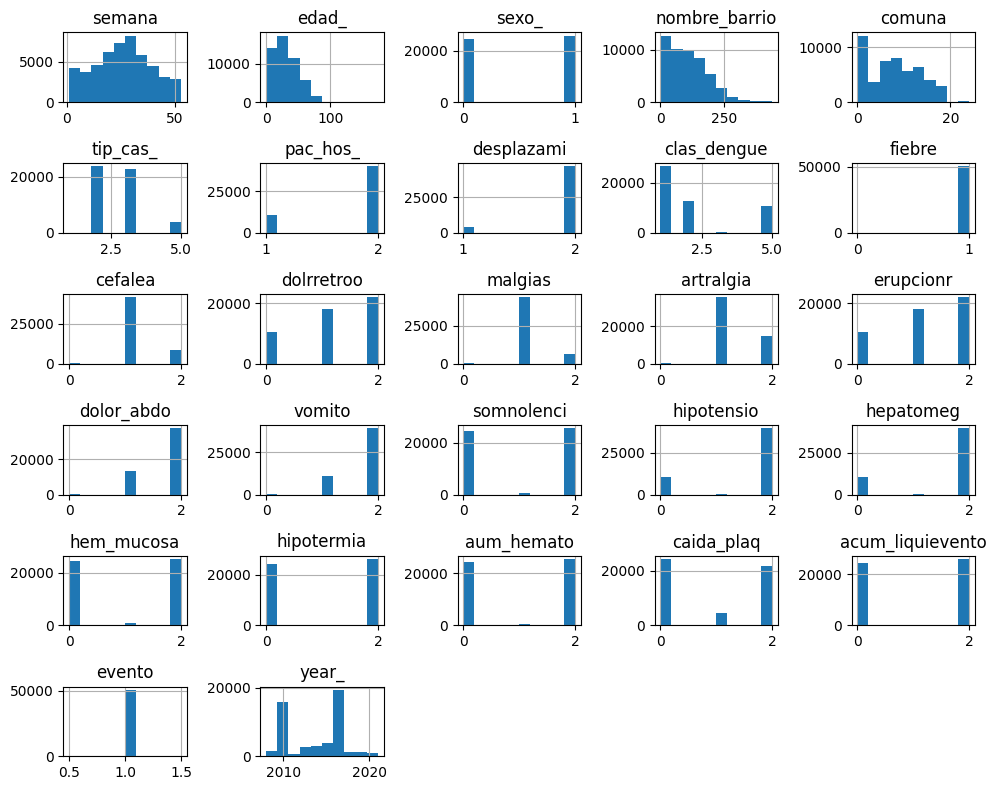

In [36]:
# Crear histograma de todas las variables númericas

import matplotlib.pyplot as plt

data_copia.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos tiene correlación con la variable objetivo, justifique su respuesta.

In [37]:
# hacer copia y eliminar columnas que no son relevantes para la clasificación del modelo

columnas_a_eliminar_2 = ['semana','edad_','year_','sexo_','nombre_barrio','comuna','tip_cas_','pac_hos_','desplazami','evento']

data_copia_modelo = data_copia.copy()

data_copia_modelo = data_copia_modelo.drop(columns = columnas_a_eliminar_2)

In [38]:
data_copia_modelo.head()

,clas_dengue,fiebre,cefalea,dolrretroo,malgias,artralgia,erupcionr,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento
0,5,1,2,0,1,2,0,1,2,0,0,0,0,0,0,0,0
1,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0
2,5,1,2,0,1,1,0,2,2,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0
5,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_99, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_100, *['artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_101, *['dolor_abdo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_102, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_103, *['artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_104, *['dolor_abdo'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_105, *[[['cefalea', 'artralgia'], ['artralgia', 'dolor_abdo']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_106, *['clas_dengue', 'cefalea', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_107, *['clas_dengue', 'artralgia', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_108, *['clas_dengue', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_109, *['fiebre', 'cefalea', None], **{})
chart

In [39]:
import seaborn as sns
import numpy as np

In [40]:
#reemplazo = 0.3

#valor_reemplazo = 0

#columnas_reemplazar = np.random.choice(data_copia_modelo.index, size = int(reemplazo * len(data_copia_modelo)), replace = False)

#data_copia_modelo.loc[columnas_reemplazar, 'clas_dengue'] = valor_reemplazo

In [41]:
data_copia_modelo['clas_dengue'].value_counts()

1    26407
2    12820
5    10884
3      415
Name: clas_dengue, dtype: int64

In [42]:
data_copia_modelo.head()

,clas_dengue,fiebre,cefalea,dolrretroo,malgias,artralgia,erupcionr,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento
0,5,1,2,0,1,2,0,1,2,0,0,0,0,0,0,0,0
1,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0
2,5,1,2,0,1,1,0,2,2,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0
5,5,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_110, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_111, *['artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_112, *['dolor_abdo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_113, *['cefalea'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_114, *['artralgia'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_115, *['dolor_abdo'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_116, *[[['cefalea', 'artralgia'], ['artralgia', 'dolor_abdo']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_117, *['clas_dengue', 'cefalea', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_118, *['clas_dengue', 'artralgia', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_119, *['clas_dengue', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_120, *['fiebre', 'cefalea', None], **{})
chart

In [43]:
# creación de la matriz de todos los datos
matriz_correlacion = data_copia_modelo.corr()

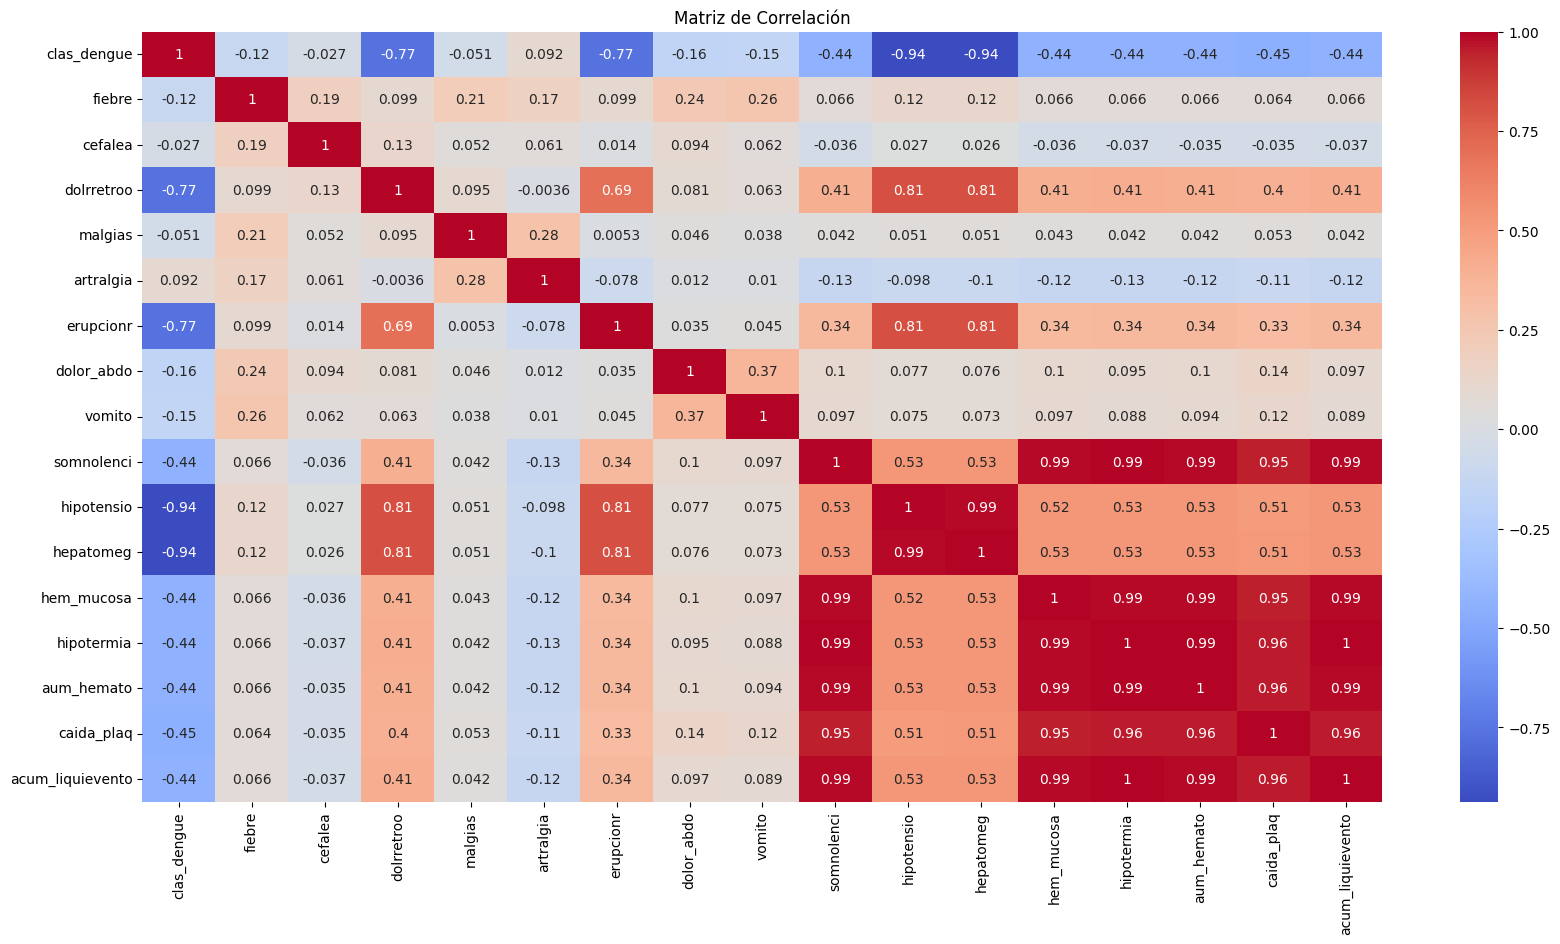

In [44]:
#Tamaño
plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like( matriz_correlacion, dtype= bool))

# Mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

#Titulo
plt.title('Matriz de Correlación')

#Figura
plt.show()

In [45]:
import seaborn as sns

correlacion = data_copia_modelo.corr()['clas_dengue']

print(correlacion)

clas_dengue         1.000000
fiebre             -0.117190
cefalea            -0.026909
dolrretroo         -0.770046
malgias            -0.051205
artralgia           0.092461
erupcionr          -0.769716
dolor_abdo         -0.161647
vomito             -0.148504
somnolenci         -0.437019
hipotensio         -0.935390
hepatomeg          -0.936472
hem_mucosa         -0.437737
hipotermia         -0.435257
aum_hemato         -0.436874
caida_plaq         -0.450759
acum_liquievento   -0.435708
Name: clas_dengue, dtype: float64


**Análisis de correlación**

Se realiza un análisis de la relación entre los sintomas tales como la fiebre, cefalea, dolrretrro, entre otroe en total 16 sintomatologías relacionadas medicamente al dengue, pero estos se relacionan mediante la clasificación de este een sin signos de alarma, con signos de alarma, grave o no aplica, por lo cual se encuentra que se tienen corelaciones negativas que oscilan entre el -0.02 y el 0-93 en los sintomas de cefalea y hepatomeg, lo que conlleva a determinar que la correlacion es inversa en relación a la variable clase. Pero por otro lado si se obtiene la correlación entre todos los sintomas se puede determinar que existen correlaciones positivas entre los sintomas en si y su afectación por el dengue



6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# División del dataset en un 80% en entrenamiento y en un 20% en pruebas
train_data, test_data = train_test_split(data_copia_modelo, test_size=0.2, random_state=42)

In [48]:
# Imprimir la división de los datos
print("Conjunto de entrenamiento:", len(train_data))
print("Conjunto de prueba:", len(test_data))

Conjunto de entrenamiento: 40420
Conjunto de prueba: 10106


7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del método utilizado para su conjunto de datos.

En el caso del conjunto de datos relaciona al dengue, se validan que este cuenta con 6 atributos con un typo de dato númerico y el resto de 31 atributos son de caracteristicas object por lo cual se debe generar la transformación que se encuentra en el codigo anterior expuesto en el items 5, de las caracteristicas de los valores a tipo numerico, definiciendo asi una escala de números enteros para su manejo.

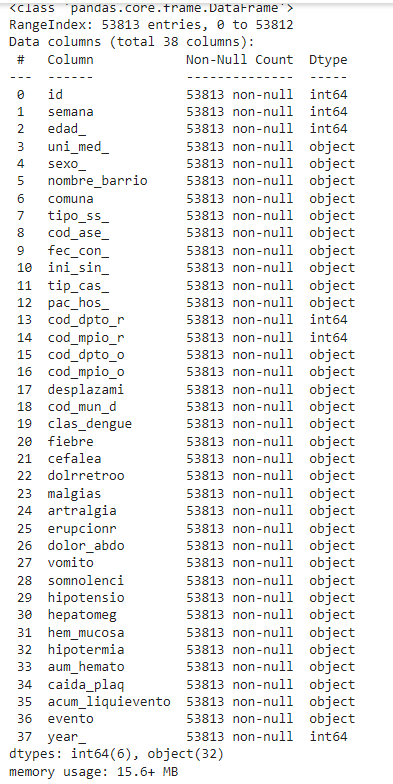

8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos.

In [49]:
# Estandarizar los datos

import numpy as np
from sklearn.preprocessing import StandardScaler


In [50]:
scaler = StandardScaler()


In [51]:
data_estandarizado = scaler.fit_transform(data_copia_modelo)

print("Datos originales:\n", data_copia_modelo)
print("\nDatos estandarizados:\n", data_estandarizado)

Datos originales:
        clas_dengue  fiebre  cefalea  dolrretroo  malgias  artralgia  \
0                5       1        2           0        1          2   
1                5       1        1           0        1          1   
2                5       1        2           0        1          1   
4                5       1        1           0        1          1   
5                5       1        1           0        1          1   
...            ...     ...      ...         ...      ...        ...   
53808            5       1        2           1        1          1   
53809            5       1        1           2        1          1   
53810            5       1        2           2        1          1   
53811            5       1        1           2        1          1   
53812            5       1        1           1        2          2   

       erupcionr  dolor_abdo  vomito  somnolenci  hipotensio  hepatomeg  \
0              0           1       2           0     

Se elige el metódo de estandarizar los datos dado que se tienen datos en el dataset con diferentes escalas y requiero que todos esten en una misma para que generen el mismo impacto al modelo y que asi puedan generar una influencia a los valores atípicos.

Adicionalmente la estandarización es util para trabajar con la distribución gaussina como el modelo de base radial lo pide.

9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de centroides

Para la selección del número de centroides, primero genere la división de los datos para el modelo k-means con el fin de identificar los cluster que se adapataran para mi red neuronal, por lo cual se realiza una función for que recorra el ciclo de 1 hasta 10 evaluando el resultado esperado en cada uno de los cluster, con una funcion random_state que controla la aletoriakidad de los datos en relacion a la variable xy posteriormente se grafica en una grafica de dispersión para evaluar los el mejor cluster generado y donde se pueda obtener el valor +optimo a mi modelo.



# **Modelo K-Means**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import os

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [54]:
datos_copia_an_borr = data_copia_modelo.copy()

In [55]:
# Definición de las variables "X" y "Y"
y = datos_copia_an_borr['clas_dengue']

y

0        5
1        5
2        5
4        5
5        5
        ..
53808    5
53809    5
53810    5
53811    5
53812    5
Name: clas_dengue, Length: 50526, dtype: int64

In [56]:
X = datos_copia_an_borr.drop(['clas_dengue'], axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
X_train.shape, X_test.shape

((40420, 16), (10106, 16))

In [59]:
wcss=[]

In [60]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

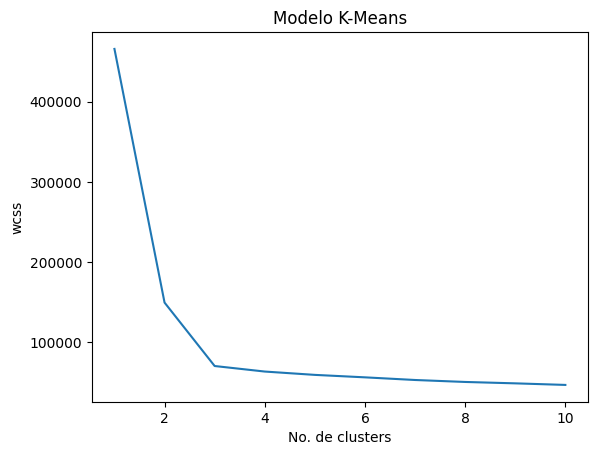

In [61]:
plt.plot(range(1,11), wcss)
plt.title('Modelo K-Means')
plt.xlabel('No. de clusters')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

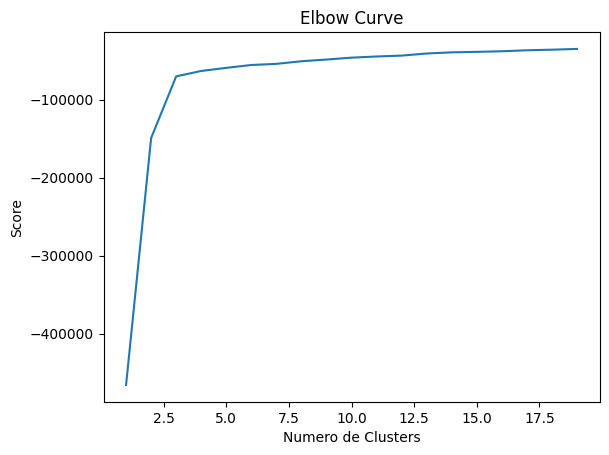

In [62]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 1.00000000e+00  1.26924782e+00  1.98936013e+00  1.26584897e+00
   1.37904537e+00  1.00000000e+00  1.81661002e+00  1.82902320e+00
   1.97576474e+00  1.99083789e+00  1.99216787e+00  1.96675041e+00
   1.99734003e+00  1.97768583e+00  1.84852963e+00  1.99098567e+00]
 [ 9.99710082e-01  1.20852359e+00  1.58244546e+00  1.12437486e+00
   1.32550554e+00  1.67840835e+00  1.70377618e+00  1.74784373e+00
   1.53654867e-13  1.99101254e+00  1.99463652e+00 -3.37729844e-13
  -2.23154828e-13  2.66231481e-13  2.17438574e-04  2.89918098e-04]
 [ 9.80803953e-01  1.14739143e+00  3.80119738e-04  1.09075359e+00
   1.37869429e+00  2.85089803e-04  1.67366721e+00  1.71500523e+00
   1.24122934e-13 -1.63646874e-13 -3.73923115e-13 -1.79634085e-13
  -7.59392549e-14  2.30038211e-13  1.93400851e-13 -6.88338275e-15]
 [ 1.00000000e+00  1.14975463e+00  1.56933671e+00  1.10503404e+00
   1.21988286e+00  2.00000000e+00  1.76515751e+00  1.80220041e+00
   1.97625455e+00  1.98749406e+00  1.99279721e+00  1.96319455e+00
   1.99

In [64]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


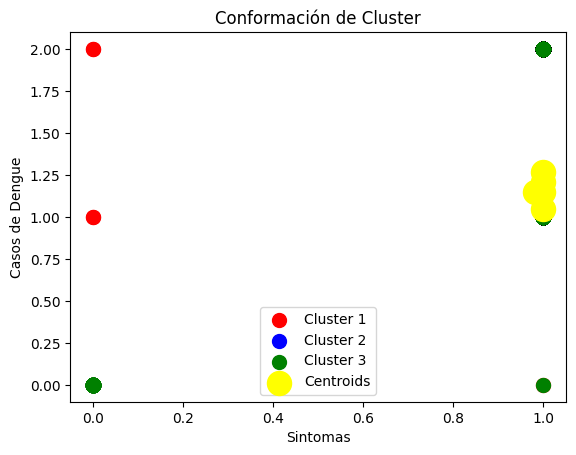

In [65]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Conformación de Cluster')
plt.xlabel('Sintomas')
plt.ylabel('Casos de Dengue')
plt.legend()
plt.show()

# **Ajustar pesos con la distancia euclidiana**

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')  # 'distance' aplica pesos por la inversa de la distancia
knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [68]:
accuracy = knn_model.score(X_test, y_test)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9250940035622403


# **Función de la distribución Gaussiana**

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:

# CReación funcion gauddiana
def gaussian_function(x, mu, sigma):
    exponent = -((x - mu)**2) / (2 * sigma**2)
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    return coefficient * np.exp(exponent)

In [71]:
# Parámetros de la distribución gaussiana
mu = 0  # Media
sigma = 1  # Desviación estándar

In [72]:
# Genera valores de x para los cuales se calculará la función gaussiana
x_values = np.linspace(-5, 5, 100)

In [73]:
# Calcula los valores correspondientes de la función gaussiana
gaussian_values = [gaussian_function(X, mu, sigma) for x in x_values]

In [74]:
# Genera datos aleatorios siguiendo una distribución gaussiana
num_samples = 1000
random_samples = np.random.normal(mu, sigma, num_samples)

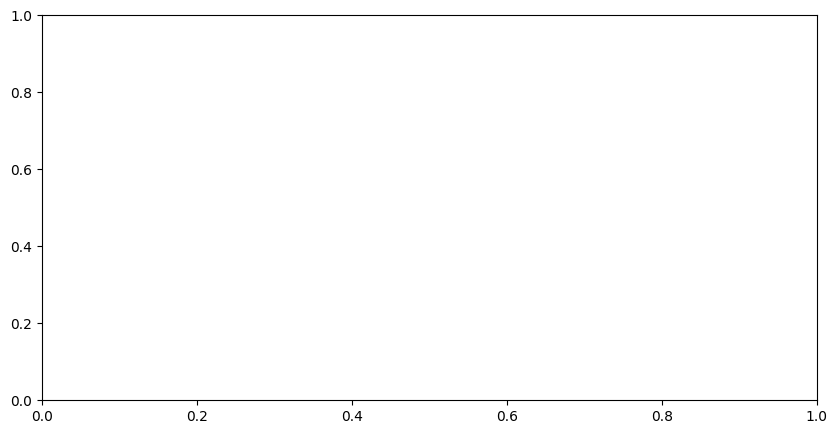

In [75]:
# Crear una figura con dos subplots
fig, ax = plt.subplots(figsize=(10, 5))

# **Creación Red Neuronal de base radial de Clasificación**

Red Nuronal de Base Radial con la libreria Sklear sin definir tasa de error o aprendizaje

In [76]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.neural_network import MLPClassifier

In [77]:
# Aplicar K-Means para determinar los centros de las funciones de base radial
n_centers = 3
kmeans = KMeans(n_clusters=n_centers)
kmeans.fit(X)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
# Calcular las distancias entre los datos y los centros
distances = pairwise_distances(X, centers)

In [79]:
# Crear la capa de funciones de base radial
sigma = distances.std()  # Parámetro de ancho de la función de base radial
rbf_layer = np.exp(-distances ** 2 / (2 * sigma ** 2))

In [80]:
# Crear y entrenar una RBFNN con una capa oculta y función de activación lineal
rbfnn = MLPClassifier(hidden_layer_sizes=(n_centers,), activation='identity', max_iter=1000)
rbfnn.fit(rbf_layer, y)

MLPClassifier(activation='identity', hidden_layer_sizes=(3,), max_iter=1000)

In [81]:
# Predecir etiquetas usando la RBFNN
predictions = rbfnn.predict(rbf_layer)

In [82]:
# Evaluar la precisión del modelo
accuracy = np.mean(predictions == y)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8337885445117366


Red Neuronal de Base Radial definiendo Tasa de aprendizaje y error con la libreria Tensor Flow

In [83]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans

In [84]:
n_centers = 3
kmeans = KMeans(n_clusters=n_centers)
kmeans.fit(X)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
# Calcular las distancias entre los datos y los centros
distances_train = pairwise_distances(X_train, centers)
distances_test = pairwise_distances(X_test, centers)

In [86]:
# Crear la capa de funciones de base radial
sigma = distances_train.std()
rbf_layer_train = np.exp(-distances_train ** 2 / (2 * sigma ** 2))
rbf_layer_test = np.exp(-distances_test ** 2 / (2 * sigma ** 2))

In [87]:
learning_rate_values = [0.01, 1e-7]

In [88]:
# Crear y entrenar una RBFNN con perceptrón usando TensorFlow
for learning_rate in learning_rate_values:
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(n_centers,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print(f"Entrenando con tasa de aprendizaje {learning_rate}")
model.fit(rbf_layer_train, y_train, epochs=100, verbose=1)

loss, accuracy = model.evaluate(rbf_layer_test, y_test)
print(f"Resultados para tasa de aprendizaje {learning_rate}:")
print(f"Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}")


Entrenando con tasa de aprendizaje 1e-07
Epoch 1/100
1264/1264 [==============================] - 3s 2ms/step - loss: -0.0726 - accuracy: 0.2926
Epoch 2/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0731 - accuracy: 0.2926
Epoch 3/100
1264/1264 [==============================] - 7s 5ms/step - loss: -0.0736 - accuracy: 0.2926
Epoch 4/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0740 - accuracy: 0.2926
Epoch 5/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0745 - accuracy: 0.2926
Epoch 6/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0750 - accuracy: 0.2926
Epoch 7/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0754 - accuracy: 0.2926
Epoch 8/100
1264/1264 [==============================] - 3s 3ms/step - loss: -0.0759 - accuracy: 0.2926
Epoch 9/100
1264/1264 [==============================] - 2s 2ms/step - loss: -0.0763 - accuracy: 0.2926
Epoch 10/100
1264/1264 

10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada.

# **Validación Cruzada**

In [89]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [90]:
# Definir topologias cada una representa el número de centros (Neuronas) en la capa oculta a utilizar
topologies = [5, 20, 50]

In [91]:
# Validación cruzada con sklearn (cross_val_score)
for topology in topologies:
    kmeans = KMeans(n_clusters=topology)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    distances = pairwise_distances(X_train, centers)
    sigma = distances.std()
    rbf_layer = np.exp(-distances ** 2 / (2 * sigma ** 2))

    rbfnn = MLPClassifier(hidden_layer_sizes=(topology,), activation='logistic', max_iter=1000)
    scores = cross_val_score(rbfnn, rbf_layer, y_train, cv=3, scoring='accuracy')

    print(f"Topología: {topology} Neuronas")
    print("Resultados de validación cruzada (accuracy):", scores)
    print("Precisión media:", np.mean(scores))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topología: 5 Neuronas
Resultados de validación cruzada (accuracy): [0.92207214 0.9268166  0.92444148]
Precisión media: 0.924443403544399


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topología: 20 Neuronas
Resultados de validación cruzada (accuracy): [0.92370491 0.92792993 0.92347658]
Precisión media: 0.9250371433010919


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topología: 50 Neuronas
Resultados de validación cruzada (accuracy): [0.924076   0.92741038 0.92770727]
Precisión media: 0.9263978803038615


La elección y la evaluación de las topologia sugeridad se debe a que el dataset tiene una gran cantidad de datos tanto en sus atributos como en sus variables por lo cual aumentar el número de neuronas podria ajustar meor las metricas dadas anteriormente.

Adicionalmente con más capas y unidades, la red podría aprender a ajustarse en exceso a los datos de entrenamiento y no generalizar bien a nuevos datos.

11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones imprima el error cuadrático medio de las predicciones y explique su respuesta.

# **Matriz de confusión**

In [92]:
pip install scikit-learn seaborn

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [94]:
# Crear un modelo MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [95]:
# Ajustar (entrenar) el modelo con los datos de entrenamiento
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [96]:
# predicciones utilizando el modelo ajustado
predictions = mlp_model.predict(X_test)

In [97]:
# Crear la matriz de confusión
confusion = confusion_matrix(y_test, predictions)

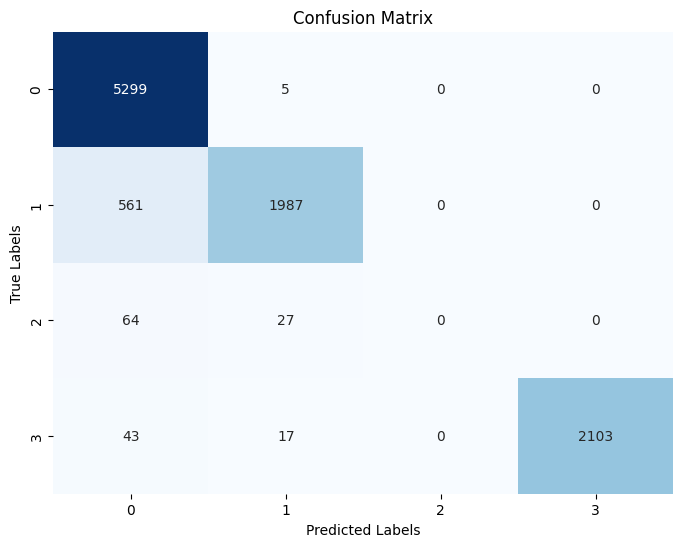

In [98]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Conclusiones Finales**

De acuerdo a la medición de los cluster y la red neuronal entrenada en 100 epocas y con 3 cluster de acuerdo a los datos en relación a la clase de denge se puede deducir:

*   El entrenamiento del modelo genera una pérdida negativa del -0,1177 lo cual no es usual, dado que un buen modelo puede generar una perdida en positivo pero un bajo procentaje;
*   Una precisión del 0.2964 indica que aproximadamente el 29.64% de las predicciones hechas por el modelo son correctas, lo que demuestra que el modelo no esta clasificando correctamente;
*   EL modelo actual puede requerir ajustes significadtivos en su implementación o en la función de pérdida o el cálculo de métricas;
*   Evaluar la tasa de aprendizaje dado que es muy baja (1e-07) podría estar causando que el modelo no converja adecuadamente durante el entrenamiento. Esto podría llevar a resultados poco realistas y pérdida negativa;
*   Puede tambien influir la cantidad o calidad de los datos de entrenamiento pueda influir en el rendimiento del modelo;
*   Se debe de evaluar la forma en que se está entrenando el modelo, el numero de epocas, la cantidad de neurnoas, en la elección de hiperparámetros o en la calidad de los datos dado que pueden estar afectando el modelo;
*   Se deben de evaluar las iteraciones del modelo, y su perdida de datos para que se pueda aplicar mejor su rendimiento;
